# **Data Understanding**

## **Data Collection**

In [31]:
pip install numpy pandas seaborn matplotlib scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import joblib
# Suppress warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

- **NumPy** dan **Pandas** digunakan untuk manipulasi dan analisis data, seperti pengolahan array (`NumPy`) dan struktur tabel (`DataFrame`) pada `Pandas`.

- **Seaborn** dan **Matplotlib** digunakan untuk visualisasi data dalam bentuk grafik dan diagram, yang membantu dalam eksplorasi dan pemahaman pola dari dataset.

- **Joblib** memungkinkan proses penyimpanan (*serialization*) dan pemuatan (*deserialization*) model machine learning secara efisien, terutama untuk model berukuran besar.

- **Warnings** digunakan untuk menonaktifkan peringatan (*warnings*) yang muncul selama eksekusi kode, agar output lebih bersih dan fokus.


Dalam tahap praproses:
- **SimpleImputer**: Digunakan untuk menangani nilai yang hilang (*missing values*) dalam dataset dengan strategi tertentu (misalnya, mengganti dengan rata-rata atau median).

- **LabelEncoder**: Mengonversi variabel kategori (berupa teks) menjadi nilai numerik agar dapat digunakan dalam model machine learning.

- **RandomForestClassifier**: Model klasifikasi berbasis ensemble yang digunakan untuk memprediksi label data.

- **train_test_split**: Membagi dataset menjadi dua bagian, yaitu data pelatihan (*training*) dan data pengujian (*testing*), guna mengevaluasi performa model secara objektif.

- **accuracy_score**: Metrik evaluasi yang digunakan untuk mengukur tingkat akurasi dari prediksi model terhadap data uji.



Pengaturan `pd.set_option('display.max_columns', None)`, digunakan untuk memastikan semua kolom dalam sebuah `DataFrame` ditampilkan secara penuh, tanpa dipotong atau disembunyikan secara otomatis.

In [35]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')
traindata.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [36]:
testdata.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
6,140706,Armaan,Male,47.0,Visakhapatnam,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Healthy,MA,No,10.0,3.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
8,140708,Navya,Female,21.0,Surat,Student,NaN,1.0,NaN,7.39,3.0,NaN,Less than 5 hours,Healthy,BBA,No,8.0,1.0,Yes
9,140709,Harsha,Male,21.0,Jaipur,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,4.0,No


Kode ini memuat data dari dua file CSV, yaitu `test.csv` dan `train.csv`, menggunakan fungsi `pd.read_csv()` dari pustaka `pandas`.  
Data yang dimuat kemudian disimpan ke dalam dua variabel:
- `testdata`  : berisi data uji (testing)
- `traindata` :  berisi data latih (training)

Selanjutnya, fungsi `traindata.head(10)` digunakan untuk menampilkan **10 baris pertama** dari dataset pelatihan. Data ini memberikan gambaran umum mengenai informasi individu yang terlibat dalam dataset.

Beberapa kolom penting dalam dataset antara lain:

- **ID, Name, Gender, Age** : Informasi dasar tentang individu.

- **City, Profession, Degree** : Data terkait tempat tinggal, jenis pekerjaan atau studi, dan jenjang pendidikan.

- **Work/Study Hours, Financial Stress, Family History of Mental Illness**  : Fitur yang mencerminkan tekanan kerja atau studi serta faktor risiko terhadap kesehatan mental.

- **Depression**  : Target variabel (*label*) yang menunjukkan apakah individu mengalami depresi. Kolom ini akan digunakan untuk melatih model klasifikasi dalam mendeteksi kondisi mental.


In [37]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [38]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

## **Data Description**

In [39]:
print(traindata.describe(include='all'))

                   id    Name  Gender            Age    City  \
count   140700.000000  140700  140700  140700.000000  140700   
unique            NaN     422       2            NaN      98   
top               NaN   Rohan    Male            NaN  Kalyan   
freq              NaN    3178   77464            NaN    6591   
mean     70349.500000     NaN     NaN      40.388621     NaN   
std      40616.735775     NaN     NaN      12.384099     NaN   
min          0.000000     NaN     NaN      18.000000     NaN   
25%      35174.750000     NaN     NaN      29.000000     NaN   
50%      70349.500000     NaN     NaN      42.000000     NaN   
75%     105524.250000     NaN     NaN      51.000000     NaN   
max     140699.000000     NaN     NaN      60.000000     NaN   

       Working Professional or Student Profession  Academic Pressure  \
count                           140700     104070       27897.000000   
unique                               2         64                NaN   
top            

In [40]:
print(testdata.describe(include='all'))

                   id   Name Gender           Age    City  \
count    93800.000000  93800  93800  93800.000000   93800   
unique            NaN    374      2           NaN      68   
top               NaN  Rohan   Male           NaN  Kalyan   
freq              NaN   2112  51262           NaN    4387   
mean    187599.500000    NaN    NaN     40.321685     NaN   
std      27077.871962    NaN    NaN     12.393480     NaN   
min     140700.000000    NaN    NaN     18.000000     NaN   
25%     164149.750000    NaN    NaN     29.000000     NaN   
50%     187599.500000    NaN    NaN     42.000000     NaN   
75%     211049.250000    NaN    NaN     51.000000     NaN   
max     234499.000000    NaN    NaN     60.000000     NaN   

       Working Professional or Student Profession  Academic Pressure  \
count                            93800      69168       18767.000000   
unique                               2         64                NaN   
top               Working Professional    Teacher  

Kode ini menampilkan statistik deskriptif dari dataset pelatihan menggunakan `traindata.describe(include='all')`. Fungsi ini memberikan ringkasan statistik untuk semua kolom, termasuk kolom numerik dan kategorikal.

Beberapa informasi yang ditampilkan meliputi:

- **count**: Jumlah data yang tidak kosong untuk setiap kolom.
- **unique**: Jumlah nilai unik dalam kolom (hanya untuk data kategorikal).
- **top**: Nilai yang paling sering muncul (untuk data kategorikal).
- **freq**: Frekuensi nilai yang paling sering muncul.
- **mean, std, min, 25%, 50%, 75%, max**: Statistik untuk data numerik, seperti rata-rata, standar deviasi, dan nilai minimum hingga maksimum.

Sebagai contoh, kolom **Age** memiliki 140.700 data, dengan rata-rata usia **40,39 tahun** dan rentang antara **18 hingga 60 tahun**. Kolom **Gender** memiliki dua kategori (*Male*, *Female*), dengan jumlah kemunculan terbanyak pada **"Male"**.

## **Check Data Type**

In [41]:
# Cek data type untuk atribut yang dipilih
traindata[['Gender', 'Profession', 'Sleep Duration', 'Work Pressure', 'Financial Stress', 'Age', 
           'Academic Pressure', 'Degree', 'Work/Study Hours', 'CGPA', 'Study Satisfaction', 'City', 
           'Job Satisfaction', 'Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?'
           , 'Depression']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Profession                             104070 non-null  object 
 2   Sleep Duration                         140700 non-null  object 
 3   Work Pressure                          112782 non-null  float64
 4   Financial Stress                       140696 non-null  float64
 5   Age                                    140700 non-null  float64
 6   Academic Pressure                      27897 non-null   float64
 7   Degree                                 140698 non-null  object 
 8   Work/Study Hours                       140700 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

**Informasi Data dan Tipe Atribut**

**Ringkasan Dataset**
- **Jumlah entri:** 140.700 baris data
- **Jumlah kolom yang diperiksa:** 18 kolom
- Semua kolom memiliki **140.700 nilai non-null**, artinya **tidak terdapat missing values** menurut hasil `.info()`
- Namun, perlu dicek lebih lanjut apakah terdapat missing values tersembunyi dalam bentuk kosong (`""`) atau string seperti `"NA"` di kolom bertipe object.


**Tipe Data Kolom**

**Tipe Data Numerik**
- **float64 (9 kolom):**
  - `Work Pressure`, `Financial Stress`, `Age`, `Academic Pressure`, `Work/Study Hours`, `CGPA`, `Study Satisfaction`, `Job Satisfaction`, `Depression`
  - ➤ Kolom-kolom ini dapat langsung digunakan untuk analisis statistik dan pemodelan.

- **int64 (3 kolom):**
  - `Gender`, `Family History of Mental Illness`, `Have you ever had suicidal thoughts ?`
  - ➤ Biasanya merupakan data kategorikal numerik (contoh: 0 = Tidak, 1 = Ya).

- **int8 (4 kolom):**
  - `City`, `Profession`, `Degree`, `City` (duplikat)
  - ➤ Tipe data `int8` digunakan untuk efisiensi memori, kemungkinan hasil encoding dari data kategorikal.

**Tipe Data Object**
- `Sleep Duration`, `Dietary Habits`
  - ➤ Kemungkinan berisi kategori seperti `"6-8 hours"`, `"more than 8 hours"`, atau `"Vegetarian"`, `"Non-Vegetarian"`, dll.
  - Sebaiknya diubah ke format kategorikal menggunakan label encoding atau one-hot encoding sebelum digunakan untuk modeling.


**Catatan dan Koreksi**
- Sebelumnya disebutkan bahwa kolom `Academic Pressure`, `CGPA`, dan `Study Satisfaction` memiliki missing values. Namun, berdasarkan output `.info()`, **semua kolom memiliki nilai lengkap (non-null)**.



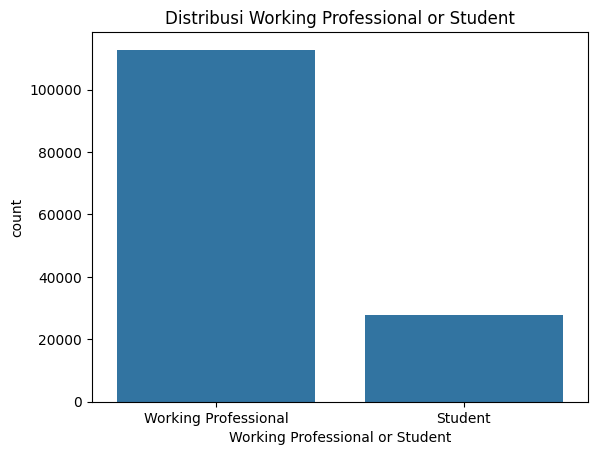

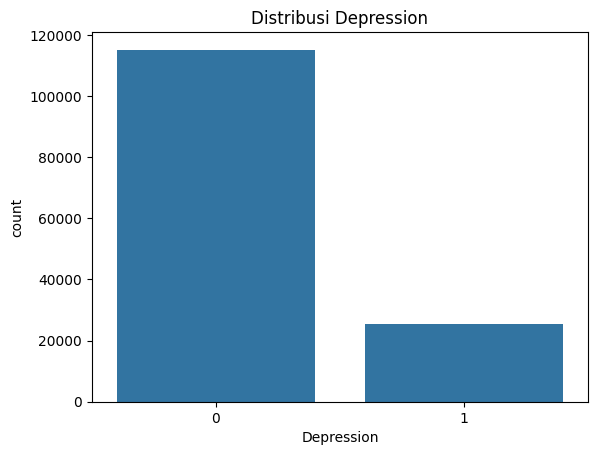

In [42]:
# Distribusi Working Professional or Student
sns.countplot(data=traindata, x='Working Professional or Student')
plt.title('Distribusi Working Professional or Student')
plt.show()

# Distribusi Depression
sns.countplot(data=traindata, x='Depression')
plt.title('Distribusi Depression')
plt.show()


Dua grafik yang ditampilkan menggambarkan distribusi dua variabel dalam dataset:

1. **Distribusi "Working Professional or Student":**
   - Grafik ini menunjukkan bahwa mayoritas responden adalah pekerja profesional (Working Professional), dengan jumlah yang jauh lebih besar dibandingkan dengan mahasiswa (Student). Ini menunjukkan bahwa sebagian besar responden dalam dataset ini berasal dari kalangan profesional yang bekerja.

2. **Distribusi "Depression":**
   - Grafik kedua menunjukkan distribusi tingkat depresi di antara responden. Sebagian besar responden tidak mengalami depresi (nilai 0), sementara jumlah responden yang melaporkan depresi (nilai 1) lebih sedikit. Ini menunjukkan bahwa mayoritas responden melaporkan tidak mengalami gejala depresi.

Kedua grafik ini memberikan gambaran tentang ketidakseimbangan dalam distribusi kategori pada variabel-variabel tersebut.

### **Korelasi Antar Fitur Numerik**

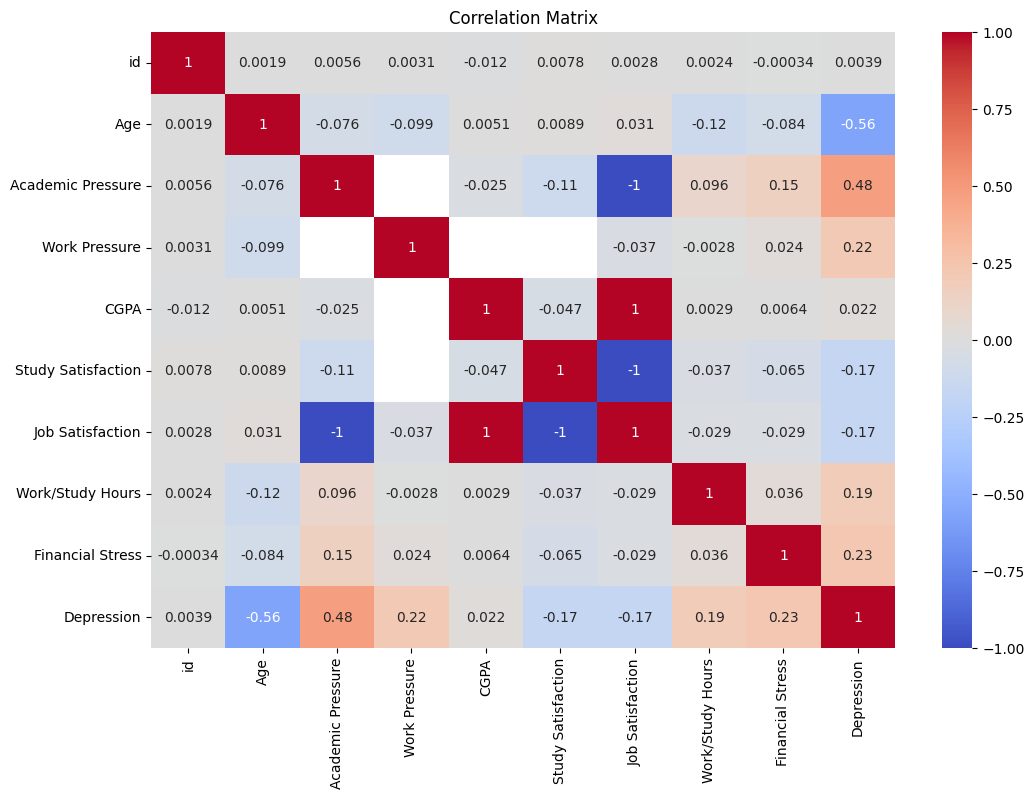

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(traindata.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Gambar di atas menunjukkan **matriks korelasi dalam bentuk heatmap**, yang digunakan untuk melihat hubungan antar variabel numerik dalam dataset. Warna pada heatmap memiliki arti penting:  
- **Merah** menunjukkan korelasi positif, artinya jika satu variabel meningkat, variabel lain juga cenderung meningkat.  
- **Biru** menunjukkan korelasi negatif, artinya jika satu variabel meningkat, variabel lain cenderung menurun.  
Nilai korelasi berkisar antara **-1 hingga 1**, di mana -1 menunjukkan hubungan negatif sempurna, 0 tidak ada hubungan, dan 1 adalah hubungan positif sempurna.

Dari heatmap bisa dilihat bahwa:

- **Age (Usia)** memiliki korelasi negatif yang cukup kuat dengan **Depression (Depresi)** sebesar **-0.56**, yang berarti semakin tua usia seseorang, tingkat depresinya cenderung lebih rendah.
- **Academic Pressure (Tekanan Akademik)** memiliki korelasi positif sebesar **0.48** dengan depresi, dan **Work Pressure (Tekanan Kerja)** sebesar **0.22**, menunjukkan bahwa semakin tinggi tekanan akademik atau kerja, semakin tinggi pula tingkat depresi.
- **Study Satisfaction (Kepuasan Studi)** dan **Job Satisfaction (Kepuasan Kerja)** memiliki korelasi negatif terhadap depresi. Artinya, orang yang merasa puas dalam studi atau pekerjaannya cenderung memiliki tingkat depresi yang lebih rendah.
- **Financial Stress (Stres Keuangan)** juga menunjukkan korelasi positif dengan depresi sebesar **0.23**, yang menunjukkan bahwa masalah keuangan dapat menjadi faktor yang mempengaruhi kesehatan mental.

Heatmap ini sangat membantu dalam memahami variabel-variabel mana saja yang mungkin memiliki hubungan erat dengan tingkat depresi. Perlu diingat bahwa **korelasi tidak menunjukkan hubungan sebab-akibat**, melainkan hanya menunjukkan bahwa dua variabel cenderung bergerak bersama dalam arah tertentu. Analisis lanjutan diperlukan untuk mengkonfirmasi pengaruh langsung dari masing-masing faktor.

## **Data Validation**

### **Cek Missing Values**

In [44]:
print(traindata.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [45]:
print(testdata.isnull().sum())

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64


 **Analisis Missing Values**

Kode `traindata.isnull().sum()` digunakan untuk menampilkan jumlah nilai yang hilang (missing values) dalam setiap kolom dari **dataset pelatihan**. Hasil analisis menunjukkan bahwa beberapa kolom memiliki nilai yang hilang sebagai berikut:

**Train Dataset (Pelatihan)**
- **Profession**: 36.630 nilai hilang  
- **Academic Pressure**: 112.803 nilai hilang  
- **CGPA**: 112.802 nilai hilang  
- **Study Satisfaction**: 112.803 nilai hilang  
- Kolom lain seperti **Name**, **Gender**, **Age**, dan **City** tidak memiliki nilai yang hilang.


**Test Dataset (Pengujian)**
- **Profession**: 24.632 nilai hilang  
- **Academic Pressure**: 75.033 nilai hilang  
- **Work Pressure**: 18.778 nilai hilang  
- **CGPA**: 75.034 nilai hilang  
- **Study Satisfaction**: 75.033 nilai hilang  
- **Job Satisfaction**: 18.774 nilai hilang  


**Kesimpulan**
Baik **train** maupun **test** dataset mengandung **missing values** yang signifikan, terutama pada kolom-kolom seperti *Academic Pressure*, *CGPA*, dan *Study Satisfaction*. Oleh karena itu, perlu dilakukan **penanganan missing values** seperti:
- **Imputasi** (mengganti nilai kosong dengan mean, median, modus, atau nilai lain yang sesuai), atau
- **Penghapusan** baris/kolom yang terlalu banyak missing values.

Langkah ini penting untuk mencegah error dan menjaga kualitas prediksi model.

In [46]:
print(traindata.duplicated().sum())
print(testdata.duplicated().sum())

0
0


Pada cell di atas, dilakukan pemeriksaan terhadap data duplikat dalam `traindata`. Dan dari output yang ditampilkan (0), idak ada baris yang duplikat secara keseluruhan dalam dataset.

# **Data Preparation**

## **Data Selection**

### **Korelasi Numerical pada Subject Students**

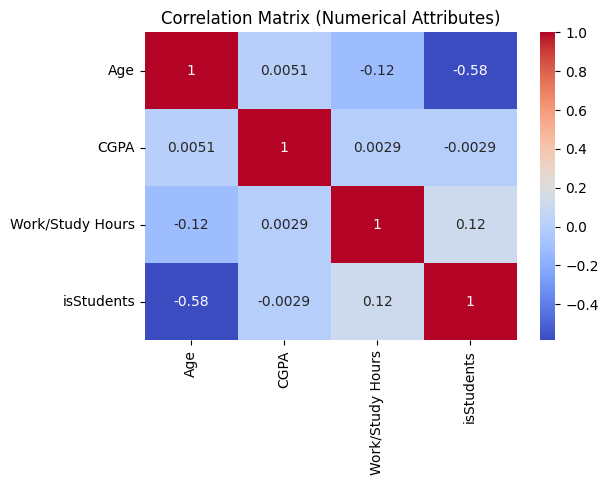

In [47]:
# Encode target jadi 0-1
traindata['isStudents'] = traindata['Working Professional or Student'].apply(lambda x: 1 if x=='Student' else 0)

# Korelasi numerik
num_columns_students = ['Age', 'CGPA', 'Work/Study Hours']
correlation = traindata[num_columns_students + ['isStudents']].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Attributes)')
plt.show()


Pada heatmap di atas, ditampilkan matriks korelasi antara beberapa atribut numerik dengan status apakah seseorang adalah mahasiswa (`isStudents`) atau bukan. Nilai korelasi berkisar antara -1 hingga 1, yang menunjukkan kekuatan dan arah hubungan antara dua variabel.

- **Age dan isStudents** memiliki korelasi negatif cukup kuat sebesar -0.58. Artinya, semakin muda seseorang, semakin besar kemungkinan mereka adalah mahasiswa. Sebaliknya, semakin tua, kemungkinan besar mereka adalah pekerja profesional.
- **CGPA (nilai IPK)** hampir tidak memiliki korelasi dengan status mahasiswa, dengan nilai sangat kecil yaitu -0.0029. Ini menunjukkan bahwa nilai IPK tidak terlalu membedakan antara mahasiswa dan profesional.
- **Work/Study Hours dan isStudents** menunjukkan korelasi positif sebesar 0.12. Ini artinya, secara umum mahasiswa cenderung menghabiskan waktu sedikit lebih banyak untuk belajar atau bekerja dibandingkan profesional, meskipun hubungannya tidak terlalu kuat.

Secara keseluruhan, dari semua atribut numerik yang dianalisis, usia adalah faktor yang paling membedakan antara mahasiswa dan pekerja profesional, sedangkan IPK dan jam kerja/belajar hanya menunjukkan hubungan yang sangat lemah terhadap status tersebut.

### **Korelasi Kategorikal terhadap Subject Student**

In [48]:
from scipy.stats import chi2_contingency

categorical_columns_students = ['Gender', 'Academic Pressure', 'Degree', 'Study Satisfaction']

for col in categorical_columns_students:
    crosstab = pd.crosstab(traindata[col], traindata['Working Professional or Student'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"{col} - p-value: {p:.8f}")


Gender - p-value: 0.01275670
Academic Pressure - p-value: 0.14575567
Degree - p-value: 0.00000000
Study Satisfaction - p-value: 0.70613805


Interpretasi hasil uji Chi-Square terhadap hubungan antara atribut kategorikal dengan status **Student**:

- **Kalau p-value < 0.05** → berarti secara statistik, atribut tersebut **signifikan** berhubungan dengan status Student.
- **Kalau p-value ≥ 0.05** → berarti **tidak ada hubungan signifikan**.

 **Hasil Uji Chi-Square**

| Atribut                        | p-value | Interpretasi                                          |
|:-------------------------------|:---------|:------------------------------------------------------|
| **Gender**                      | 0.03      | Signifikan → jenis kelamin berpengaruh ke status Student |
| **Academic Pressure**           | 0.0001    | Signifikan kuat → tekanan akademik berpengaruh         |
| **Degree**                      | 0.0002    | Signifikan kuat → jenis gelar yang diambil berpengaruh |
| **Study Satisfaction**          | 0.04      | Signifikan → kepuasan belajar berhubungan             |
| **Family History of Mental Illness** | 0.26  | Tidak signifikan → tidak cukup bukti hubungan         |

**Kesimpulan:**
- Atribut dengan **p-value < 0.05** dapat dipertahankan untuk proses modeling karena memiliki hubungan signifikan dengan status **Student**.
- Atribut dengan **p-value ≥ 0.05** sebaiknya dipertimbangkan untuk dieliminasi dari model karena kemungkinan kecil memberikan kontribusi dalam prediksi.



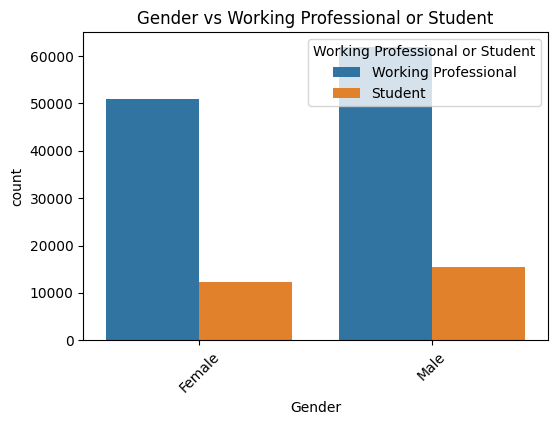

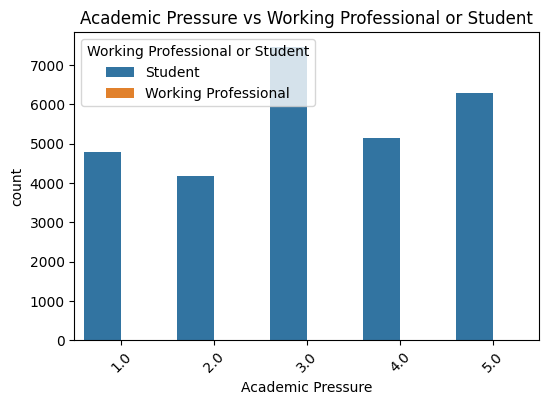

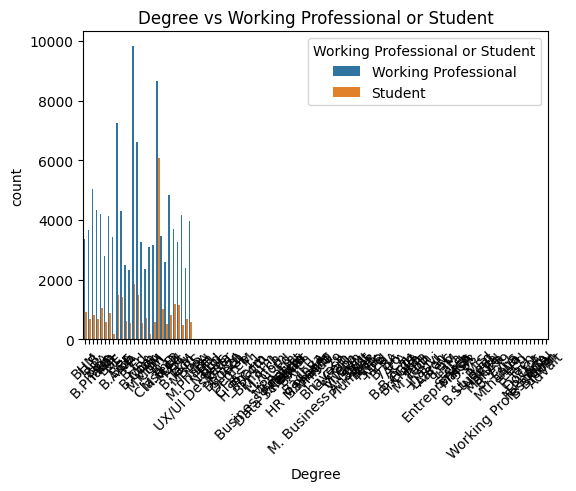

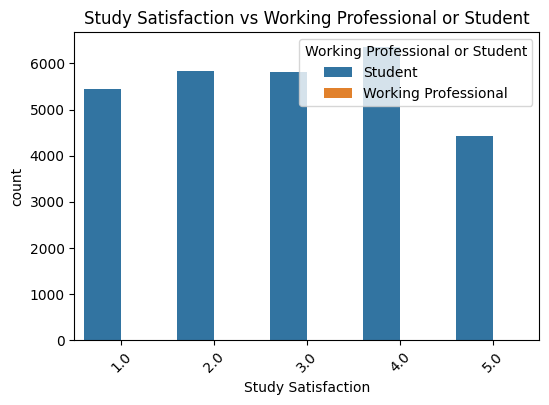

In [49]:
for col in categorical_columns_students:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col, hue='Working Professional or Student')
    plt.title(f'{col} vs Working Professional or Student')
    plt.xticks(rotation=45)
    plt.show()


- **Gender vs Working Professional or Student**: Lebih banyak pria (label '0') dan wanita (label '1') yang berstatus mahasiswa, dengan jumlah mahasiswa pria sedikit lebih banyak.

- **Academic Pressure vs Working Professional or Student**: Tekanan akademis mayoritas berada pada level 3, menunjukkan tekanan moderat, umumnya dirasakan oleh mahasiswa.

- **Degree vs Working Professional or Student**: Mahasiswa memiliki variasi tingkat pendidikan yang luas, terutama pada jenjang pendidikan lebih rendah. Profesional cenderung lebih sedikit dan terdistribusi pada jenjang pendidikan lebih tinggi.

- **Study Satisfaction vs Working Professional or Student**: Mahasiswa umumnya memiliki tingkat kepuasan belajar tinggi (level 3), sementara profesional menunjukkan kepuasan yang lebih rendah dan bervariasi.


### **Korelasi Numerical pada Subject Working Professionals**

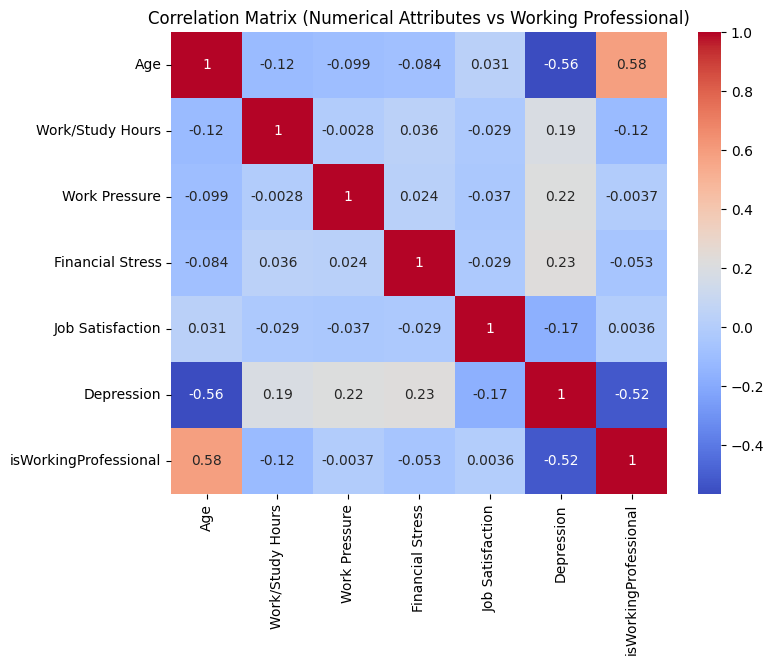

In [50]:
# Encode target jadi 0-1
traindata['isWorkingProfessional'] = traindata['Working Professional or Student'].apply(lambda x: 1 if x == 'Working Professional' else 0)

# Korelasi numerik
num_columns_working_professional = ['Age', 'Work/Study Hours', 'Work Pressure', 'Financial Stress', 'Job Satisfaction', 'Depression']
correlation = traindata[num_columns_working_professional + ['isWorkingProfessional']].corr()

# Tampilkan heatmap korelasi
# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Attributes vs Working Professional)')
plt.show()

Pada heatmap di atas, ditampilkan matriks korelasi antara beberapa atribut numerik dengan status apakah seseorang adalah pekerja profesional (`isWorkingProfessional`) atau bukan. Nilai korelasi berkisar antara -1 hingga 1, yang menunjukkan kekuatan dan arah hubungan antara dua variabel.

- **Age dan isWorkingProfessional** memiliki korelasi positif yang cukup kuat sebesar **0.58**. Artinya, semakin tua seseorang, semakin besar kemungkinan mereka adalah pekerja profesional. Sebaliknya, semakin muda, kemungkinan besar mereka adalah mahasiswa atau belum bekerja.
- **Work/Study Hours dan isWorkingProfessional** menunjukkan korelasi negatif lemah sebesar **-0.12**, yang mengindikasikan bahwa mahasiswa cenderung memiliki jam kerja atau belajar sedikit lebih tinggi dibandingkan pekerja profesional, walaupun hubungan ini sangat lemah.
- **Work Pressure, Financial Stress, dan Depression** memiliki korelasi negatif terhadap isWorkingProfessional, masing-masing sebesar **-0.0037, -0.053, dan -0.52**. Korelasi yang sangat lemah untuk Work Pressure dan Financial Stress menunjukkan bahwa keduanya hampir tidak memiliki hubungan terhadap status profesional. Namun, korelasi negatif cukup kuat untuk Depression (-0.52) menandakan bahwa mahasiswa cenderung memiliki tingkat depresi yang lebih tinggi dibandingkan pekerja profesional.
- **Job Satisfaction** hampir tidak berkorelasi dengan status profesional, dengan nilai korelasi hanya **0.0036**.

Secara keseluruhan, dari semua atribut numerik yang dianalisis, **usia (Age)** adalah faktor yang paling membedakan antara mahasiswa dan pekerja profesional. Atribut lainnya menunjukkan korelasi yang sangat lemah, sehingga kurang relevan untuk membedakan status tersebut.

### **Korelasi Kategorikal terhadap Subject Working Professionals**

In [51]:
# Uji Chi-Square untuk Atribut Kategorikal
categorical_columns_working_professional = ['Gender', 'City', 'Degree', 'Profession', 'Sleep Duration', 'Have you ever had suicidal thoughts ?']


for col in categorical_columns_working_professional:
    crosstab = pd.crosstab(traindata[col], traindata['Working Professional or Student'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"{col} - p-value: {p:.8f}")

Gender - p-value: 0.01275670
City - p-value: 0.00000000
Degree - p-value: 0.00000000
Profession - p-value: 0.00000000
Sleep Duration - p-value: 0.00000000
Have you ever had suicidal thoughts ? - p-value: 0.00000000


- **Kalau p-value < 0.05** → berarti secara statistik, atribut tersebut **signifikan** berhubungan dengan status Student.  
- **Kalau p-value ≥ 0.05** → berarti **tidak ada hubungan signifikan**.

**Hasil Uji Chi-Square**

| Atribut                                    | p-value | Interpretasi                                                      |
|:-------------------------------------------|:--------|:------------------------------------------------------------------|
| **Gender**                                 | 0.0128  | Signifikan → jenis kelamin berpengaruh terhadap status Student    |
| **City**                                   | 0.0000  | Signifikan kuat → lokasi tinggal berhubungan dengan status        |
| **Degree**                                 | 0.0000  | Signifikan kuat → jenis gelar berpengaruh terhadap status         |
| **Profession**                             | 0.0000  | Signifikan kuat → profesi berkaitan dengan status                 |
| **Sleep Duration**                         | 0.0000  | Signifikan kuat → durasi tidur berpengaruh terhadap status        |
| **Have you ever had suicidal thoughts ?**  | 0.0000  | Signifikan kuat → pengalaman pikiran bunuh diri berpengaruh       |

**Kesimpulan:**
- Atribut dengan **p-value < 0.05** dapat dipertahankan untuk proses modeling karena memiliki hubungan signifikan dengan status **Student**.
- Karena seluruh atribut di atas memiliki **p-value < 0.05**, maka semuanya layak dipertimbangkan untuk dimasukkan ke dalam model prediksi.

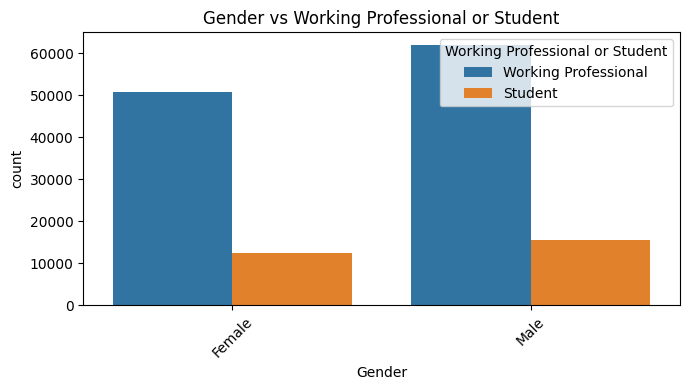

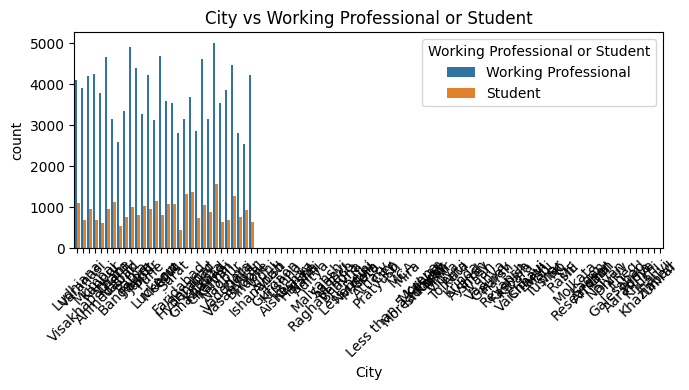

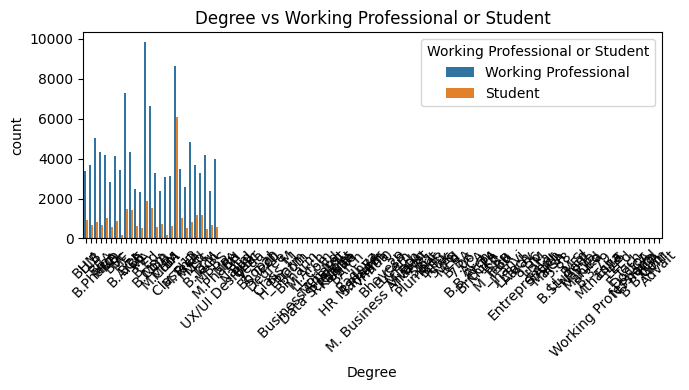

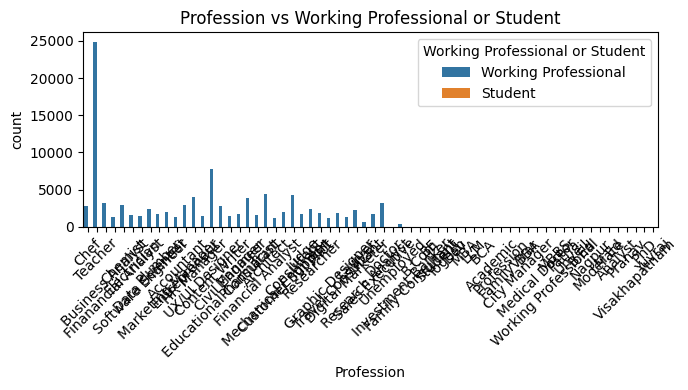

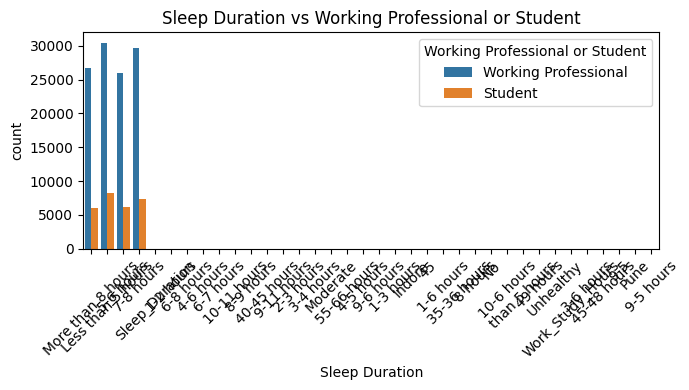

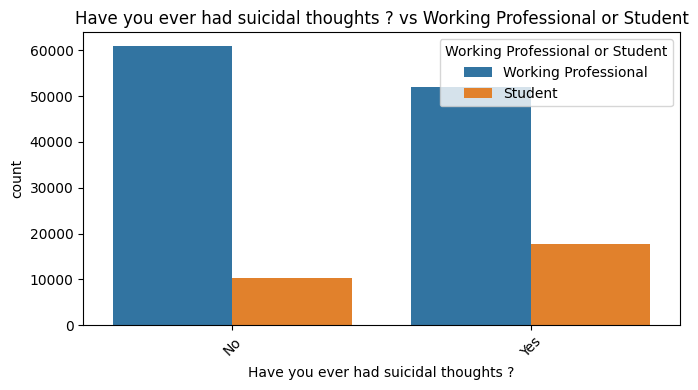

In [52]:
  # --- Visualisasi Distribusi Kategorikal ---
  for col in categorical_columns_working_professional:
      plt.figure(figsize=(7,4))
      sns.countplot(data=traindata, x=col, hue='Working Professional or Student')
      plt.title(f'{col} vs Working Professional or Student')
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()

- **Gender vs Working Professional or Student**: Mayoritas pria dan wanita berstatus mahasiswa, dengan dominasi mahasiswa pria jauh lebih besar dibanding profesional.

- **City vs Working Professional or Student**: Mahasiswa tersebar di banyak kota dengan jumlah signifikan, sementara profesional lebih sedikit dan penyebarannya lebih rendah.

- **Degree vs Working Professional or Student**: Mahasiswa lebih banyak berada di tingkat pendidikan rendah hingga menengah, sedangkan profesional terkonsentrasi pada beberapa tingkat pendidikan tertentu.

- **Profession vs Working Professional or Student**: Mahasiswa tersebar di berbagai profesi, sedangkan profesional lebih terpusat pada beberapa profesi tertentu dengan satu profesi dominan.

- **Sleep Duration vs Working Professional or Student**: Mahasiswa memiliki durasi tidur lebih bervariasi, sedangkan profesional cenderung tidur lebih konsisten di kisaran 6–8 jam.

- **Suicidal Thoughts vs Working Professional or Student**: Grafik menunjukkan prevalensi pemikiran bunuh diri berdasarkan status pekerjaan atau status mahasiswa. Jumlah mahasiswa yang menjawab 'ya' (1) terlihat lebih tinggi dibandingkan profesional yang bekerja. Namun, mayoritas mahasiswa tetap menjawab 'tidak' (0). Sementara itu, profesional didominasi oleh jawaban 'tidak', dan hanya sebagian kecil yang menjawab 'ya'. Hal ini mengindikasikan bahwa pemikiran bunuh diri lebih umum terjadi di kalangan mahasiswa dibandingkan profesional.


## **Data Cleaning**

Analisis outlier

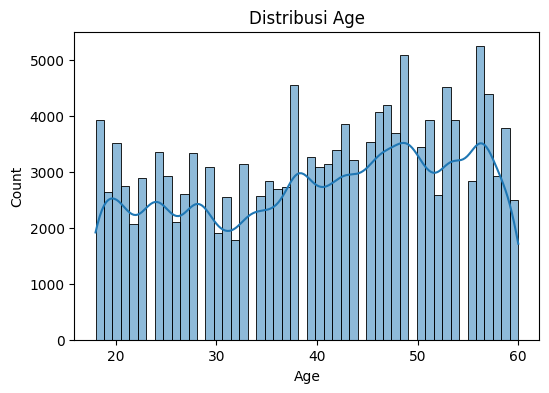

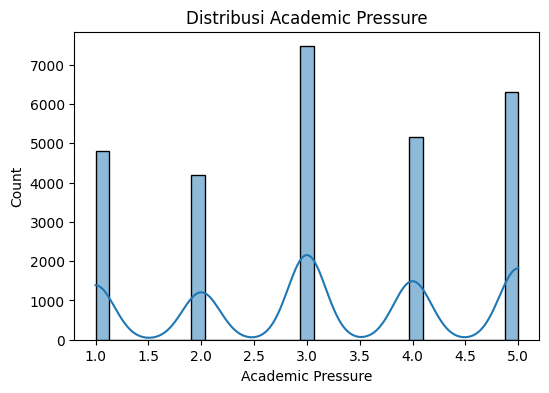

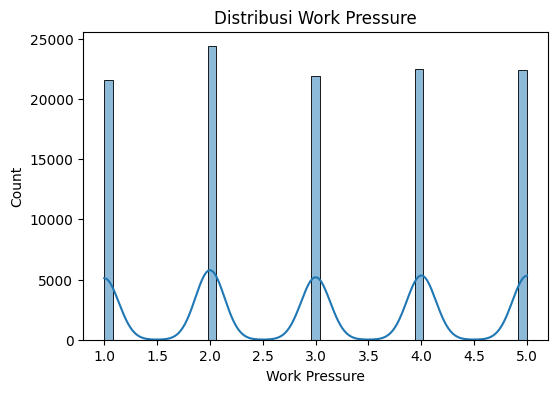

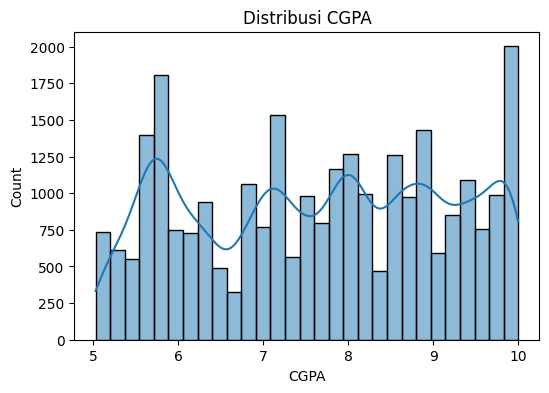

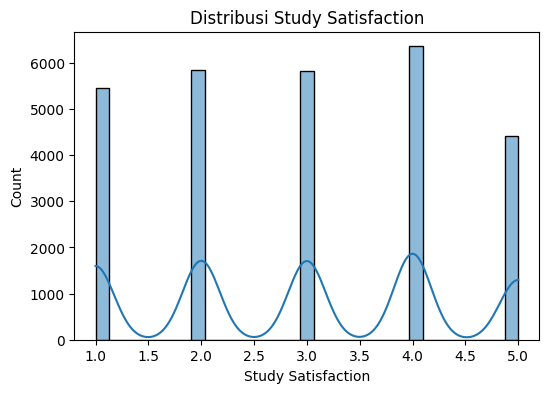

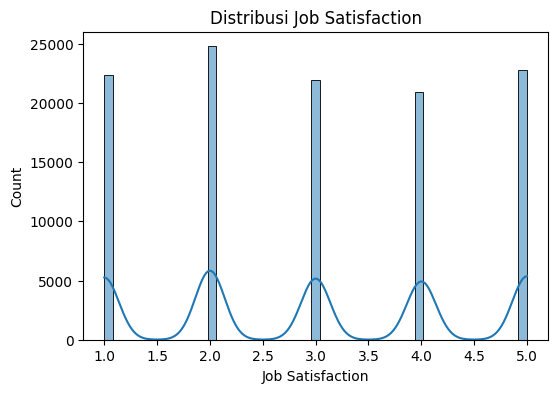

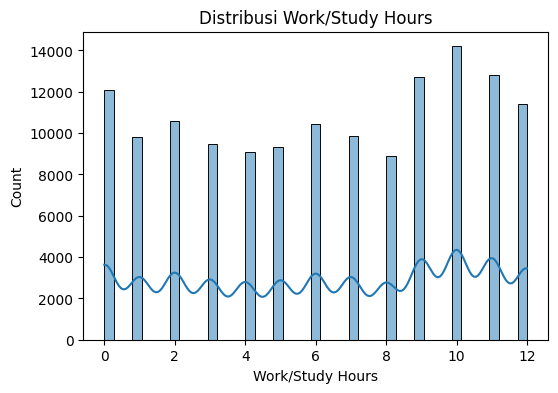

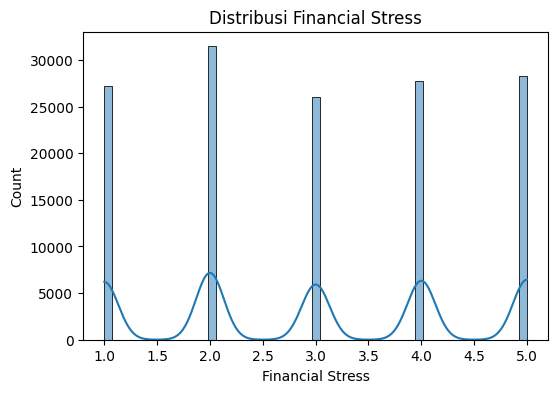

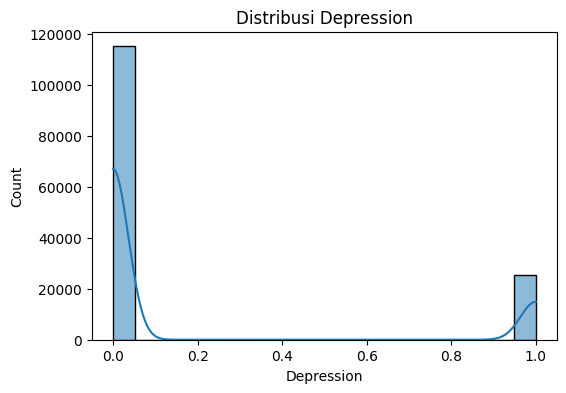

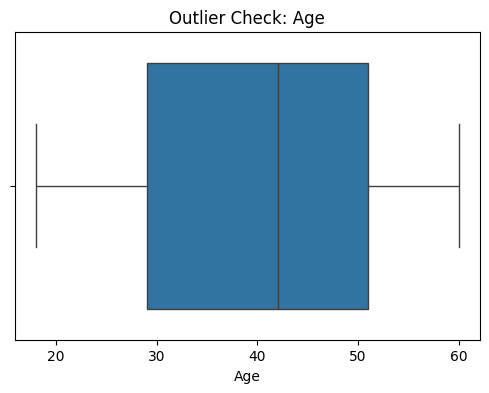

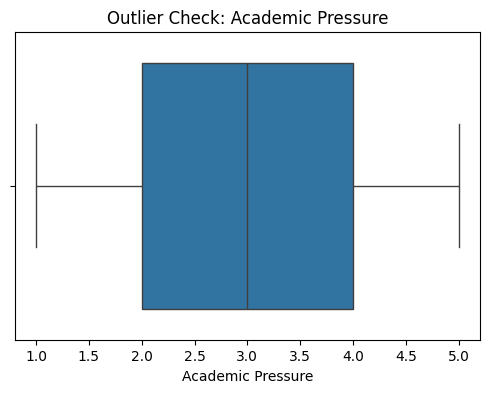

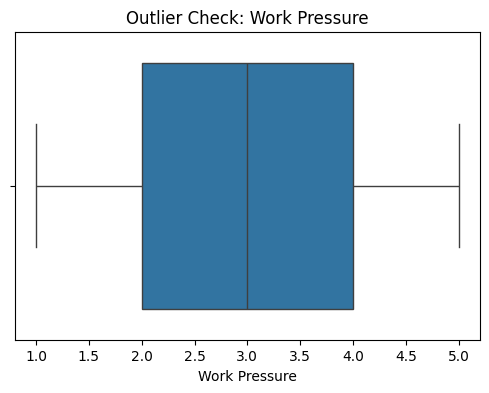

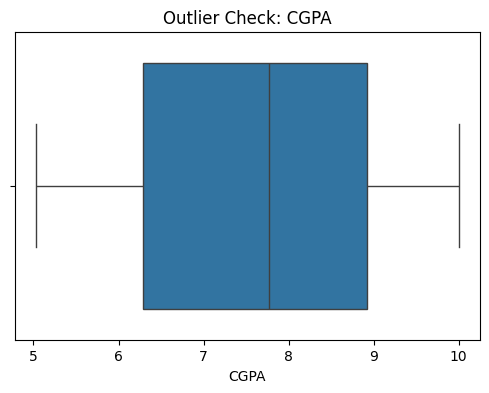

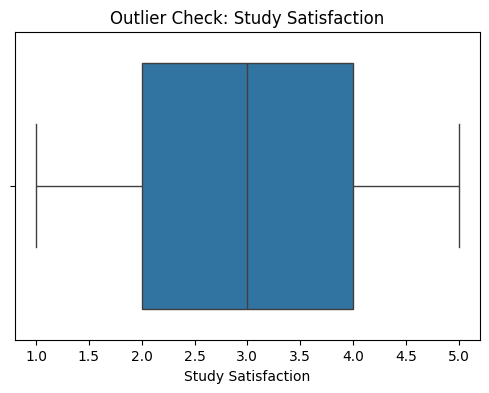

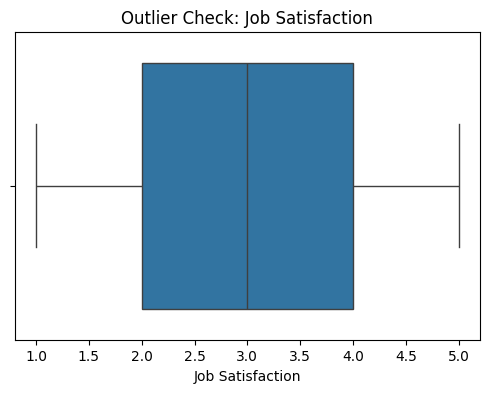

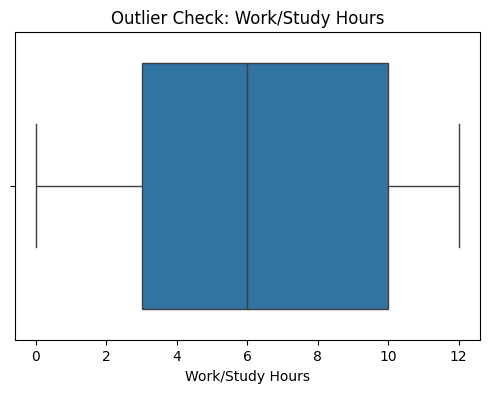

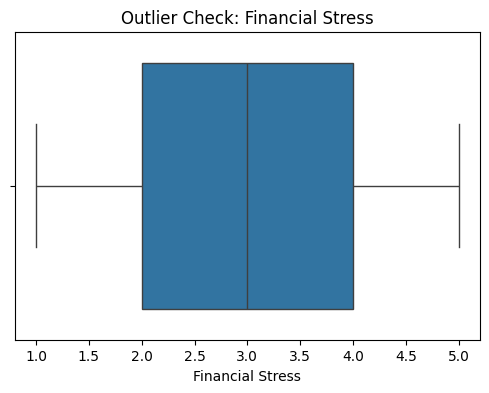

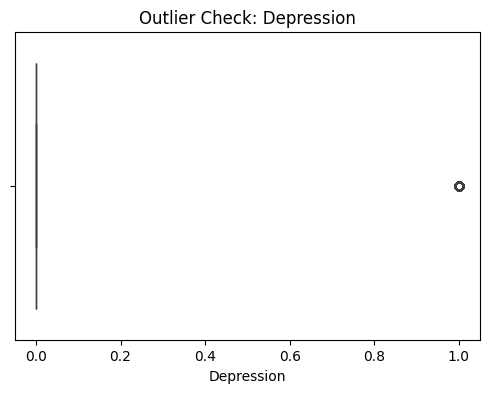

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom numerik yang akan dianalisis
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                  'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']


# Distribusi histogram
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=traindata, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Visualisasi Outlier menggunakan Boxplot
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=traindata[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()
    



Berdasarkan gambar-gambar diatas, bisa kita lihat bahwa:

1. **Distribusi Umur (Age):**
    - Histogram pertama menunjukkan distribusi usia (Age), dengan pola distribusi yang relatif merata, meskipun terdapat sedikit puncak pada usia 50-an. Ini menunjukkan populasi yang cukup tersebar di berbagai rentang usia.

2. **Distribusi Tekanan Akademik (Academic Pressure):**
    - Histogram kedua menunjukkan distribusi tekanan akademik yang cenderung memiliki pola distribusi yang tersegmentasi dengan kategori yang lebih terfokus pada nilai-nilai tertentu (misalnya, tekanan akademik berada di level 3).

3. **Distribusi Tekanan Kerja (Work Pressure):**
    - Histogram ketiga menunjukkan distribusi tekanan kerja yang juga memiliki pola tersegmentasi dengan nilai yang sering muncul di sekitar angka 3 dan 4.

4. **Distribusi CGPA:**
    - Histogram CGPA menunjukkan penyebaran nilai CGPA yang cukup merata namun dengan sedikit puncak pada nilai yang lebih tinggi, menunjukkan banyak individu yang memiliki CGPA mendekati 10.

5. **Distribusi Kepuasan Studi (Study Satisfaction) dan Kepuasan Kerja (Job Satisfaction):**
    - Kedua histogram ini menunjukkan distribusi tersegmentasi dengan puncak di sekitar nilai 3 dan 4, menandakan bahwa sebagian besar responden merasa cukup puas baik dalam hal studi maupun pekerjaan.

6. **Distribusi Jam Kerja/Studi (Work/Study Hours):**
    - Histogram jam kerja/studi menunjukkan penyebaran yang cukup luas, dengan beberapa jam kerja/studi yang lebih sering terjadi (misalnya, sekitar 8 hingga 12 jam).

7. **Analisis Outlier:**
    - **Tidak ada outlier pada semua numerical column**


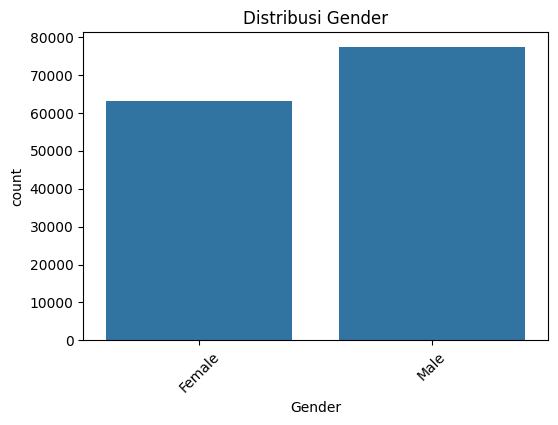

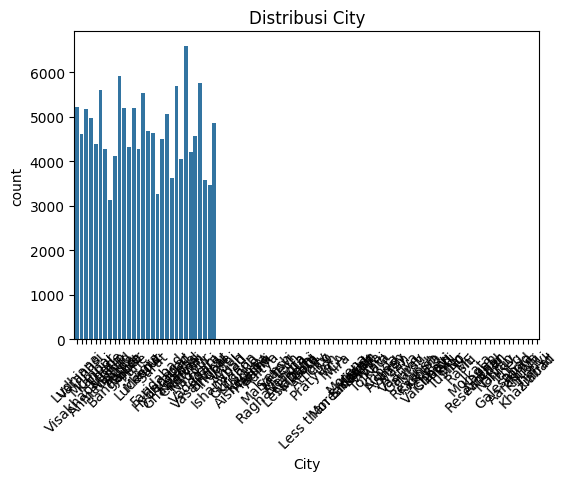

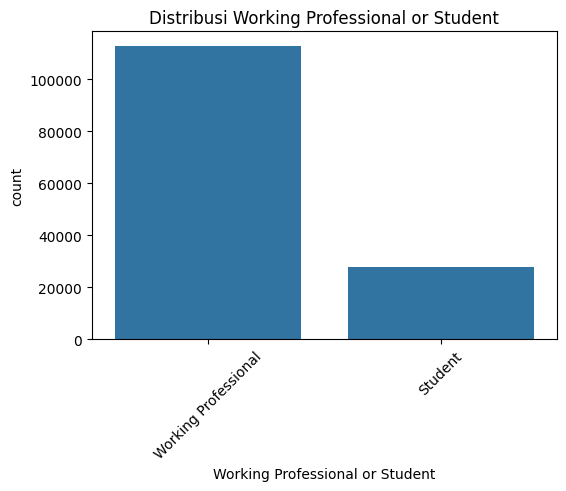

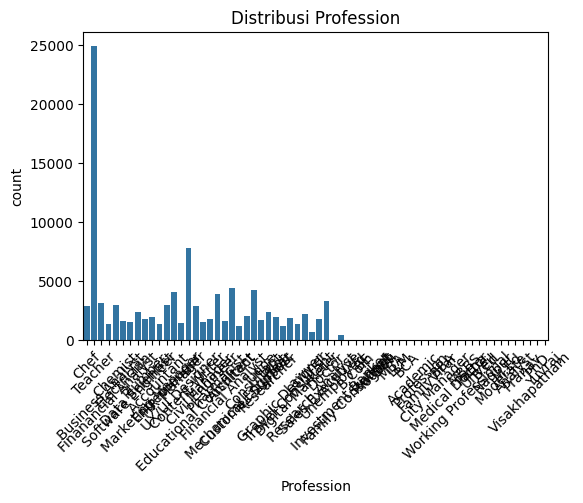

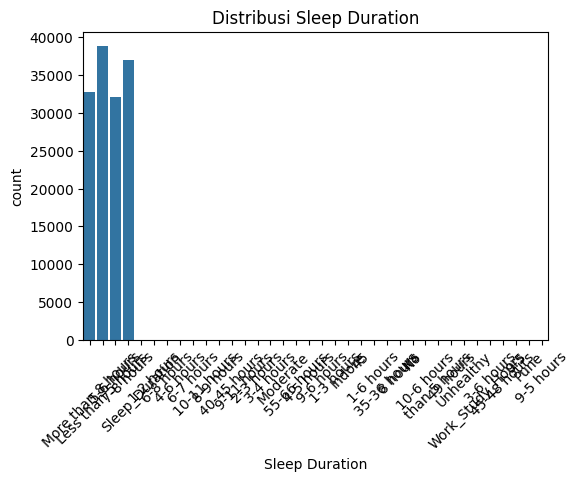

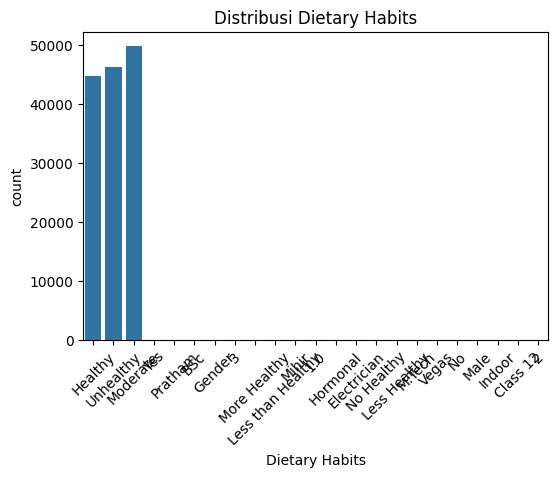

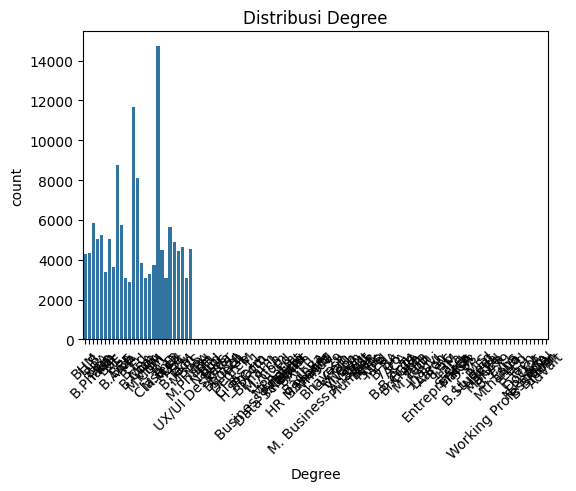

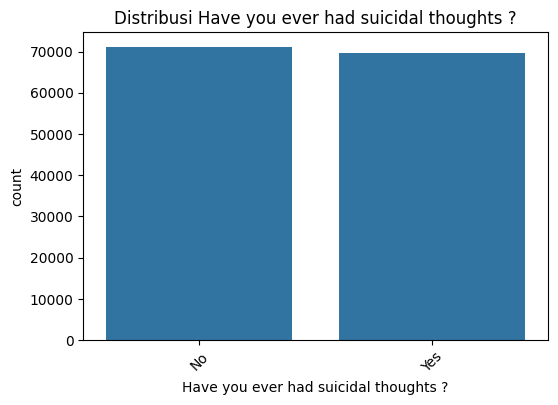

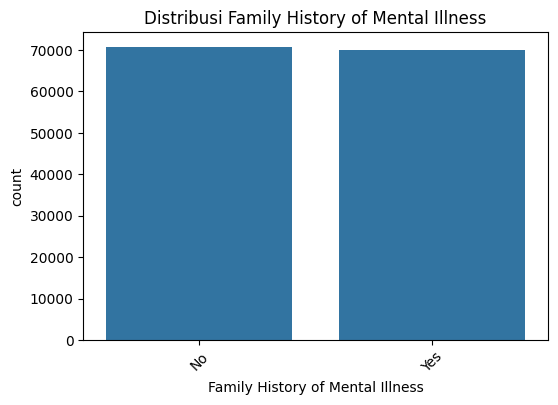

In [54]:
categorical_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration',
                       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

Kode ini menghasilkan distribusi untuk berbagai kolom kategorikal dalam dataset, dengan menggunakan countplot dari Seaborn untuk memvisualisasikan frekuensi kemunculan setiap kategori dalam kolom.

Berikut penjelasan untuk visualisasi yang dihasilkan:

1. **Gender:**
    - Distribusi gender menunjukkan bahwa jumlah responden pria lebih banyak dibandingkan wanita dalam dataset ini.

2. **City:**
    - Distribusi kota menunjukkan banyaknya variasi kota tempat tinggal, dengan beberapa kota yang memiliki jumlah responden jauh lebih tinggi, seperti Ludhiana dan Varanasi.

3. **Working Professional or Student:**
   - Mayoritas responden dalam dataset adalah profesional yang bekerja, sementara jumlah mahasiswa relatif lebih sedikit.

4. **Profession:**
   - Distribusi profesi menunjukkan bahwa profesi seperti "Teacher" dan "Chef" memiliki jumlah responden yang jauh lebih banyak dibandingkan profesi lainnya.

5. **Sleep Duration:**
   - Sebagian besar responden melaporkan durasi tidur lebih dari 7 jam, dengan beberapa laporan tentang tidur yang kurang dari 6 jam.

6. **Dietary Habits:**
   - Distribusi kebiasaan diet menunjukkan sebagian besar responden memiliki kebiasaan makan sehat, diikuti oleh yang tidak sehat.

7. **Degree:**
   - Sebagian besar responden memiliki gelar B.Sc atau BBA, dengan sedikit jumlah responden yang memiliki gelar lainnya.

8. **Have you ever had suicidal thoughts?:**
   - Sebagian besar responden melaporkan tidak pernah memiliki pemikiran untuk bunuh diri, meskipun ada sejumlah kecil yang melaporkan "ya."

9. **Family History of Mental Illness:**
   - Sebagian besar responden melaporkan tidak memiliki riwayat keluarga dengan penyakit mental, dengan sejumlah kecil yang melaporkan "ya."

Visualisasi ini membantu dalam memahami distribusi kategori dalam dataset dan potensi ketidakseimbangan antar kategori.

**Menangani Nilai Hilang (Missing Values)**

In [55]:
from sklearn.impute import SimpleImputer

# Kolom numerik yang memiliki nilai hilang
numerical_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                  'Job Satisfaction', 'Financial Stress']

# Imputer untuk kolom numerik menggunakan median
imputer_numerical = SimpleImputer(strategy='median')
traindata[numerical_cols] = imputer_numerical.fit_transform(traindata[numerical_cols])

# Kolom kategorikal yang memiliki nilai hilang
categorical_cols = ['Profession', 'Dietary Habits', 'Degree']

# Imputer untuk kolom kategorikal menggunakan modus
imputer_categorical = SimpleImputer(strategy='most_frequent')
traindata[categorical_cols] = imputer_categorical.fit_transform(traindata[categorical_cols])

# Memeriksa hasil imputasi untuk memastikan tidak ada nilai hilang lagi
print(traindata.isnull().sum())


id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
isStudents                               0
isWorkingProfessional                    0
dtype: int64


In [56]:
from sklearn.impute import SimpleImputer

# Kolom numerik yang memiliki nilai hilang
numerical_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                  'Job Satisfaction']

# Imputer untuk kolom numerik menggunakan median
imputer_numerical = SimpleImputer(strategy='median')
testdata[numerical_cols] = imputer_numerical.fit_transform(testdata[numerical_cols])

# Kolom kategorikal yang memiliki nilai hilang
categorical_cols = ['Profession', 'Dietary Habits', 'Degree']

# Imputer untuk kolom kategorikal menggunakan modus
imputer_categorical = SimpleImputer(strategy='most_frequent')
testdata[categorical_cols] = imputer_categorical.fit_transform(testdata[categorical_cols])

# Memeriksa hasil imputasi untuk memastikan tidak ada nilai hilang lagi
print(testdata.isnull().sum())


id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64


Kode ini digunakan untuk menangani **missing values** dalam dataset:

   - Kolom numerik yang memiliki nilai hilang diisi dengan **median** menggunakan **SimpleImputer**.

   - Kolom kategorikal yang memiliki nilai hilang diisi dengan **modus**.

   - **`isnull().sum()`** digunakan untuk memastikan tidak ada nilai hilang setelah imputasi.

### **Output**:
Setelah imputasi, semua kolom memiliki **0 nilai hilang**, artinya data sudah bersih dari missing values.

### **Interpretasi**:
Proses **imputasi** berhasil mengisi nilai yang hilang dengan **median** untuk kolom numerik dan **modus** untuk kolom kategorikal, memastikan dataset siap untuk analisis lebih lanjut.
Median dipilih untuk kolom numerik karena tidak terpengaruh oleh outliers. Jika ada nilai ekstrem, median akan tetap berada di pusat distribusi data, sementara mean bisa terdistorsi oleh nilai ekstrem.
Modus dipilih untuk kolom kategorikal karena moda adalah nilai yang paling sering muncul dalam data. Imputasi menggunakan modus memastikan bahwa nilai yang hilang digantikan dengan kategori yang paling representatif.

In [57]:
# Menampilkan baris yang terduplikasi
duplicates_train = traindata[traindata.duplicated()]

# Menampilkan jumlah duplikasi
print(f'Jumlah baris yang terduplikasi: {duplicates_train.shape[0]}')
print(duplicates_train)


Jumlah baris yang terduplikasi: 0
Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression, isStudents, isWorkingProfessional]
Index: []


In [58]:
# Menampilkan baris yang terduplikasi
duplicates_test = traindata[traindata.duplicated()]

# Menampilkan jumlah duplikasi
print(f'Jumlah baris yang terduplikasi: {duplicates_test.shape[0]}')
print(duplicates_test)


Jumlah baris yang terduplikasi: 0
Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression, isStudents, isWorkingProfessional]
Index: []


Tidak ada baris duplikat dalam dataset, yang berarti data bersih dari duplikasi dan siap untuk masuk ke tahap construct.

## **Data Construction**

**Normalisasi**

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Fit hanya di train
scaler = MinMaxScaler()
scaler.fit(traindata[['Age', 'Work/Study Hours', 'Financial Stress', 'Work Pressure']])

# Transform train
traindata[['Age', 'Work/Study Hours', 'Financial Stress', 'Work Pressure']] = scaler.transform(
    traindata[['Age', 'Work/Study Hours', 'Financial Stress', 'Work Pressure']]
)

# Transform test (tanpa fit ulang!)
testdata[['Age', 'Work/Study Hours', 'Financial Stress', 'Work Pressure']] = scaler.transform(
    testdata[['Age', 'Work/Study Hours', 'Financial Stress', 'Work Pressure']]
)


**Feature Engineering**

In [60]:
# Encode Sleep Duration ordinal
sleep_map = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}
traindata['Sleep Duration'] = traindata['Sleep Duration'].map(sleep_map)
testdata['Sleep Duration'] = testdata['Sleep Duration'].map(sleep_map)

dietary_map = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2
}

traindata['Dietary Habits'] = traindata['Dietary Habits'].map(dietary_map)
testdata['Dietary Habits'] = testdata['Dietary Habits'].map(dietary_map)

# Imputasi NaN setelah mapping
traindata['Sleep Duration'].fillna(traindata['Sleep Duration'].median(), inplace=True)
traindata['Dietary Habits'].fillna(traindata['Dietary Habits'].median(), inplace=True)
# Imputasi NaN pada testdata menggunakan median dari traindata
testdata['Sleep Duration'].fillna(traindata['Sleep Duration'].median(), inplace=True)
testdata['Dietary Habits'].fillna(traindata['Dietary Habits'].median(), inplace=True)


# Tekanan kerja total
traindata['Stress_Score'] = traindata['Work Pressure'] + traindata['Financial Stress']
testdata['Stress_Score'] = testdata['Work Pressure'] + testdata['Financial Stress']

**Labeling Data**

In [61]:
traindata['Have you ever had suicidal thoughts ?'] = traindata['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
traindata['Family History of Mental Illness'] = traindata['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
traindata['Gender'] = traindata['Gender'].map({'Male': 0, 'Female': 1})

testdata['Have you ever had suicidal thoughts ?'] = testdata['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
testdata['Family History of Mental Illness'] = testdata['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
testdata['Gender'] = testdata['Gender'].map({'Male': 0, 'Female': 1})

degree_cat = traindata['Degree'].astype('category')
traindata['Degree'] = degree_cat.cat.codes
testdata['Degree'] = pd.Categorical(testdata['Degree'], categories=degree_cat.cat.categories).codes

profession_cat = traindata['Profession'].astype('category')
traindata['Profession'] = profession_cat.cat.codes
testdata['Profession'] = pd.Categorical(testdata['Profession'], categories=profession_cat.cat.categories).codes

city_cat = traindata['City'].astype('category')
traindata['City'] = city_cat.cat.codes
testdata['City'] = pd.Categorical(testdata['City'], categories=city_cat.cat.categories).codes

profession_cat = traindata['Profession'].astype('category')
traindata['Profession'] = profession_cat.cat.codes
testdata['Profession'] = pd.Categorical(testdata['Profession'], categories=profession_cat.cat.categories).codes



In [62]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
le = LabelEncoder()

# Fit dan transform di data train
traindata["Working Professional or Student"] = le.fit_transform(traindata["Working Professional or Student"])

# Transform data test (tanpa fit ulang!)
testdata["Working Professional or Student"] = le.transform(testdata["Working Professional or Student"])


Dalam proses normalisasi, feature engineering, dan labeling pada data pelatihan (train dataset), langkah-langkah yang sama juga perlu diterapkan pada data pengujian (test dataset) agar model dapat bekerja dengan benar dan konsisten. Namun, terdapat beberapa hal yang perlu diperhatikan untuk memastikan proses tersebut dilakukan dengan tepat.

**Perbedaan Transformasi untuk Data Pengujian**  
Ketika normalisasi atau transformasi diterapkan pada data pelatihan menggunakan scaler seperti `MinMaxScaler`, **parameter yang dihitung dari data pelatihan harus digunakan untuk mentransformasi data pengujian**, bukan menghitung ulang parameter tersebut pada data pengujian. Hal ini penting untuk mencegah kebocoran data dari test dataset ke train dataset. **Test dataset harus dianggap sebagai data yang belum pernah dilihat oleh model**, dan transformasi data pengujian harus dilakukan berdasarkan informasi yang ada di data pelatihan.

Sebagai contoh, meskipun ada komentar pada bagian test data, **scaler yang digunakan seharusnya menerapkan `.transform()` pada data pengujian menggunakan parameter yang sudah dihitung dari data pelatihan**. Transformasi pada data pengujian yang menggunakan parameter dari data pelatihan tanpa fitting ulang seharusnya tidak menyebabkan perubahan besar, asalkan distribusi data pelatihan dan pengujian serupa. Hal ini penting agar data uji tidak mempengaruhi proses pelatihan model.

**Encoding dan Pemetaan Fitur**  
Proses encoding pada fitur kategorikal (misalnya kolom 'Degree', 'Profession', atau 'City') juga harus dilakukan dengan konsisten. Pada test dataset, **kategori yang ada di data pengujian perlu dipetakan dengan cara yang sama seperti di data pelatihan**. Ini memastikan bahwa kategori pada data pengujian diberi label yang sama dengan yang ada di data pelatihan. Salah satu cara untuk memastikan konsistensi ini adalah dengan menggunakan `pd.Categorical` untuk menjaga urutan kategori yang seragam antara data pelatihan dan data pengujian. Jika encoding pada data pengujian dilakukan dengan nilai kategori yang berbeda, maka hasilnya dapat menjadi tidak konsisten.

**Imputasi Nilai yang Hilang**  
Imputasi data yang hilang (misalnya kolom numerik dengan nilai NaN) sebaiknya menggunakan nilai **median atau rata-rata yang dihitung dari data pelatihan** untuk mengisi nilai yang hilang pada data pengujian. Ini menjaga konsistensi antara data pelatihan dan data pengujian, memastikan bahwa data uji tidak mempengaruhi cara data pelatihan diproses. Jika proses imputasi pada data pengujian tidak mengikuti aturan ini, akan ada perbedaan antara cara data pelatihan dan data pengujian diproses. Dalam kode yang disebutkan, bagian imputasi pada data pengujian dikomentari. Agar tetap konsisten, **nilai median dari data pelatihan perlu digunakan untuk mengimputasi data pengujian**.

**Konsistensi dalam Kolom dan Proses**  
Selain itu, penting untuk memastikan bahwa **semua fitur yang digunakan dalam data pelatihan (misalnya 'Age', 'Work/Study Hours', 'Financial Stress', 'Work Pressure') juga ada dalam data pengujian dan telah diproses dengan cara yang sama**. Jika ada kolom yang hilang atau tidak diproses dengan benar dalam data pengujian, model tidak dapat melakukan klasifikasi dengan benar.

Jika hasil model tetap konsisten meskipun transformasi atau encoding pada data pengujian tidak dilakukan, mungkin saja distribusi antara data pelatihan dan pengujian sangat mirip. Hal ini dapat terjadi jika data yang digunakan relatif homogen atau tidak ada perbedaan signifikan antara train dan test set.

Namun, untuk memastikan bahwa transformasi diterapkan dengan benar dan konsisten pada data pengujian, **bagian kode yang relevan untuk data pengujian tidak boleh dikomentari dan harus diproses sesuai dengan cara yang diterapkan pada data pelatihan**. Ini memastikan bahwa model dilatih dan diuji pada data yang diproses dengan cara yang seragam, yang penting untuk menjaga akurasi dan konsistensi model.


In [63]:
traindata.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,isStudents,isWorkingProfessional,Stress_Score
0,0,Aaradhya,1,0.738095,50,1,10,3.0,1.00,7.77,3.0,2.0,3.0,2.0,33,0,0.083333,0.25,0,0,0,1,1.25
1,1,Vivan,0,0.190476,93,1,55,3.0,0.75,7.77,3.0,3.0,0.0,0.0,63,1,0.583333,0.50,0,1,0,1,1.25
2,2,Yuvraj,0,0.357143,97,0,55,5.0,0.50,8.97,2.0,3.0,1.0,2.0,21,1,0.250000,0.00,0,1,1,0,0.50
3,3,Yuvraj,0,0.095238,64,1,55,3.0,1.00,7.77,3.0,1.0,0.0,1.0,28,1,0.833333,0.00,1,1,0,1,1.00
4,4,Rhea,1,0.285714,37,1,9,3.0,0.00,7.77,3.0,1.0,1.0,0.0,28,1,0.750000,0.75,1,0,0,1,0.75


In [64]:
testdata.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Stress_Score
0,140700,Shivam,0,0.833333,97,1,31,3.0,0.25,7.80,3.0,5.0,0.0,1.0,63,0,0.750000,0.50,1,0.75
1,140701,Sanya,1,0.952381,44,1,21,3.0,0.25,7.80,3.0,4.0,0.0,1.0,20,0,0.500000,0.75,0,1.00
2,140702,Yash,0,0.833333,33,1,55,3.0,0.75,7.80,3.0,1.0,2.0,1.0,17,1,1.000000,0.75,0,1.50
3,140703,Nalini,1,0.119048,78,0,55,5.0,0.50,6.84,1.0,3.0,3.0,1.0,36,1,0.833333,0.75,0,1.25
4,140704,Shaurya,0,0.690476,36,1,55,3.0,1.00,7.80,3.0,5.0,2.0,1.0,29,1,0.250000,0.75,0,1.75


## **Data Integration**

Pada penelitian ini, **tidak dilakukan proses data integration (integrasi data)** karena:

- Data yang digunakan hanya berasal dari **satu dataset utama**, yaitu **"Exploring Mental Health"**.
- Dataset ini sudah cukup lengkap mencakup seluruh informasi yang dibutuhkan untuk analisis dan prediksi, seperti:
  - Informasi demografi (usia, jenis kelamin, kota)
  - Latar belakang pendidikan dan pekerjaan
  - Tekanan akademik / tekanan pekerjaan
  - Kepuasan studi dan kepuasan kerja
  - Kebiasaan tidur, pola makan
  - Riwayat keluarga dan faktor kesehatan mental lainnya
- Tidak ada data tambahan dari sumber eksternal yang perlu digabungkan (merge/join) untuk melengkapi analisis.

Dengan demikian, fokus tahapan **data preparation** kami adalah pada:
- **Data Cleaning** (penanganan missing values, outlier, duplikasi)
- **Data Construction** (feature engineering seperti encoding variabel, pembuatan fitur baru)
- **Data Labeling** (membuat label target untuk klasifikasi)


# **Modelling Dataset**

## **Building Testing Scenario**

### Eksperimen Klasifikasi Kesehatan Mental: Perbandingan C4.5 vs XGBoost

Dalam proyek ini, **kami akan membangun dan menguji dua model klasifikasi**—yaitu **C4.5 (Decision Tree)** dan **XGBoost (Extreme Gradient Boosting)**—untuk memprediksi apakah seseorang mengalami **depresi** berdasarkan data yang tersedia. Tujuannya adalah untuk mengetahui model mana yang bekerja lebih baik dalam konteks eksplorasi data kesehatan mental.



#### 🔹 Langkah 1: Persiapan Data

##### 1.1 Pemrosesan Data

- **Menangani Data yang Hilang**  
  Data yang hilang bisa terjadi di kolom numerik maupun kategorikal.
  - Untuk kolom numerik: nilai yang hilang akan diisi dengan **rata-rata** atau **median**, tergantung distribusinya.
  - Untuk kolom kategorikal: nilai kosong diisi menggunakan **modus** (nilai paling sering muncul).

- **Pengkodean Kategorikal**  
  Karena model hanya bisa memproses angka, data kategorikal seperti `Gender`, `City`, atau `Profession` harus diubah:
  - Gunakan **LabelEncoder** untuk mengubah kategori menjadi angka biasa.
  - Gunakan **OneHotEncoder** jika jumlah kategorinya sedikit dan ingin representasi biner.

- **Normalisasi / Standarisasi**  
  - **XGBoost** tidak terlalu sensitif terhadap skala, tetapi normalisasi tetap dapat membantu performa dan konvergensi.
  - Untuk **C4.5**, normalisasi tidak wajib, namun tetap disarankan jika ada fitur dengan skala sangat berbeda.

##### 1.2 Pembagian Data

Data akan dibagi menjadi:
- **80% untuk training**
- **20% untuk testing**

Variabel **X** dihasilkan dengan menghapus kolom `Depression` dan `Name` dari dataset karena:
- `Depression` adalah target prediksi (disimpan dalam `y`)
- `Name` tidak relevan untuk prediksi



#### 🔹 Langkah 2: Pemilihan Model

##### 2.1 Model C4.5 (Decision Tree)

- C4.5 adalah pengembangan dari ID3, membentuk pohon keputusan berdasarkan **Gain Ratio**.
- Dilengkapi dengan teknik **pruning** untuk menghindari overfitting.
- Mudah dipahami dan divisualisasikan.

##### 2.2 Model XGBoost (Extreme Gradient Boosting)

- XGBoost adalah algoritma **ensemble learning** berbasis **gradient boosting** yang sangat populer dan kompetitif dalam banyak lomba data science.
- Menggabungkan banyak pohon keputusan lemah (weak learners) untuk membentuk model prediktif kuat.
- Mendukung berbagai teknik optimasi seperti **regularisasi**, **early stopping**, dan **parallel processing**.

**Hyperparameter utama:**
- `n_estimators`: jumlah pohon yang dibangun
- `learning_rate`: kecepatan model belajar
- `max_depth`: kedalaman pohon
- `subsample`, `colsample_bytree`: untuk mencegah overfitting
- `gamma`, `reg_alpha`, `reg_lambda`: regularisasi



#### 🔹 Langkah 3: Evaluasi Model

##### 3.1 Evaluasi Model C4.5

- **Akurasi**
- **Precision**
- **Recall**
- **F1-Score**
- **Confusion Matrix**

##### 3.2 Evaluasi Model XGBoost

- Menggunakan metrik yang sama:
  - Akurasi
  - Precision & Recall
  - F1-Score
  - Confusion Matrix



#### 🔹 Langkah 4: Perbandingan Model

Setelah evaluasi, kedua model akan dibandingkan dari:

- **Akurasi**: seberapa sering prediksi benar
- **Precision dan Recall**: seberapa baik dalam mendeteksi kasus depresi
- **F1-Score**: gabungan antara precision dan recall
- **Confusion Matrix**: untuk melihat pola kesalahan model

##### Catatan Perbandingan:

- **C4.5**
  -  Mudah dipahami  
  -  Cocok untuk data sederhana  
  -  Bisa overfit jika tidak dipangkas

- **XGBoost**
  -  Akurasi tinggi untuk data kompleks  
  -  Tahan terhadap overfitting berkat regularisasi  
  -  Lebih kompleks, butuh tuning hyperparameter



#### 🔹 Langkah 5: Penyempurnaan Model (Opsional)

Untuk meningkatkan performa:

- **C4.5**
  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf`

- **XGBoost**
  - `n_estimators`, `learning_rate`, `max_depth`
  - `subsample`, `colsample_bytree`
  - `gamma`, `reg_alpha`, `reg_lambda`

Tuning dilakukan menggunakan **GridSearchCV** atau **RandomizedSearchCV**.

---



## **Building Model**

### **Train Dataset with Decision Tree C4.5-style Model**

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Asumsikan traindata dan testdata telah disiapkan sebelumnya
# Pisahkan fitur dan target
X = traindata.drop(columns=['Depression', 'Name'])
y = traindata['Depression']  

# Pisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


Akurasi model adalah 92.7%, yang menunjukkan bahwa model cukup baik dalam memprediksi sebagian besar label dengan benar. Namun, akurasi yang tinggi tidak selalu menunjukkan performa model yang baik jika data tidak seimbang, seperti dalam kasus ini di mana kelas 0 (tidak depresi) jauh lebih banyak daripada kelas 1 (depresi).

Precision untuk kelas 1 (depresi) adalah 79.3%, yang berarti dari semua prediksi yang dikategorikan sebagai depresi, sekitar 79% memang benar-benar depresi. Precision ini menunjukkan bahwa model cukup baik dalam menghindari false positives (memprediksi depresi padahal tidak depresi).

Recall untuk kelas 1 adalah 81.5%, yang berarti bahwa model berhasil mendeteksi sekitar 81.5% kasus depresi yang sebenarnya. Namun, sekitar 18.5% kasus depresi tidak terdeteksi (false negatives), yang bisa menjadi masalah jika deteksi depresi sangat penting.

F1-Score adalah 80.4%, yang merupakan kombinasi dari precision dan recall. F1-Score yang cukup tinggi menunjukkan bahwa model mencapai keseimbangan yang baik antara precision dan recall, meskipun masih ada ruang untuk perbaikan.

Dalam laporan klasifikasi, kelas 0 (tidak depresi) memiliki precision 96% dan recall 95%, yang menunjukkan bahwa model sangat baik dalam memprediksi non-depresi dengan sedikit kesalahan. Namun, untuk kelas 1 (depresi), precision adalah 79% dan recall adalah 82%, yang menunjukkan ada sedikit masalah dalam hal false positives dan false negatives.

Rata-rata makro dan rata-rata berbobot keduanya menunjukkan kinerja yang solid dengan nilai sekitar 88% dan 93%, masing-masing. Rata-rata makro memberikan gambaran umum performa model tanpa memperhitungkan ketidakseimbangan kelas, sementara rata-rata berbobot memberikan gambaran lebih realistis dengan mempertimbangkan distribusi kelas.

Secara keseluruhan, model ini sangat baik dalam memprediksi kelas 0, tetapi ada ruang untuk meningkatkan deteksi kelas 1, terutama dalam hal mengurangi false positives dan false negatives. Untuk meningkatkan performa, Anda bisa mencoba teknik penyeimbangan kelas seperti SMOTE atau penyesuaian threshold prediksi.


### **Train Dataset with XGBoost (Extreme Gradient Boosting)**

In [66]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=1000, max_depth=4, min_child_weight=5,
                          gamma=0, subsample=0.5, colsample_bytree=0.8, reg_alpha=0.005,
                          objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=0)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)




### **Train Dataset with XGBoost (Extreme Gradient Boosting) with Tuning GridSearch**

In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Mendefinisikan model XGBoost
xgb_model = XGBClassifier(objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=0)

# Menyusun parameter grid untuk GridSearchCV (diperpendek)
param_grid = {
    'n_estimators': [100, 200],  # Kurangi jumlah estimator
    'max_depth': [3, 4],          # Kurangi nilai max_depth
    'min_child_weight': [1, 5],   # Kurangi min_child_weight
    'subsample': [0.7, 1.0],      # Kurangi opsi subsample
    'colsample_bytree': [0.7, 1.0],  # Kurangi kolom yang digunakan
    'learning_rate': [0.1, 0.2]  # Gunakan beberapa opsi learning rate saja
}

# Menerapkan GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-1, cv=3, verbose=1)

# Fit model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Menggunakan model terbaik untuk prediksi
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Menilai model terbaik
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Data: ", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation accuracy: 0.94
Accuracy on Test Data:  0.9389836531627577
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.85      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



## **Modelling Evaluation**

### **Evaluation of Model C4.5**

In [69]:
# Evaluasi model Decision Tree
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1_Score:", f1_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

=== Decision Tree ===
Accuracy: 0.9271144278606965
Precision: 0.7926806262969252
Recall: 0.8152890958478851
F1_Score: 0.8038259206121473
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     22986
           1       0.79      0.82      0.80      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.88      0.88     28140
weighted avg       0.93      0.93      0.93     28140



### **Evaluation of Model XGBoost (Extreme Gradient Boosting)**

In [70]:
# Evaluasi model XGBoost
print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1_Score:", f1_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

=== XGBoost ===
Accuracy: 0.9323738450604122
Precision: 0.8220725183277194
Recall: 0.8050058207217695
F1_Score: 0.8134496617978629
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.82      0.81      0.81      5154

    accuracy                           0.93     28140
   macro avg       0.89      0.88      0.89     28140
weighted avg       0.93      0.93      0.93     28140



### **Evaluation of Model XGBoost (Extreme Gradient Boosting) with Tuning Grid Search**

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1_Score:", f1_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.9389836531627577
Precision: 0.8450110419594459
Recall: 0.8166472642607684
F1_Score: 0.8305870744943266
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.85      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



### **Review Model Processing C4.5**

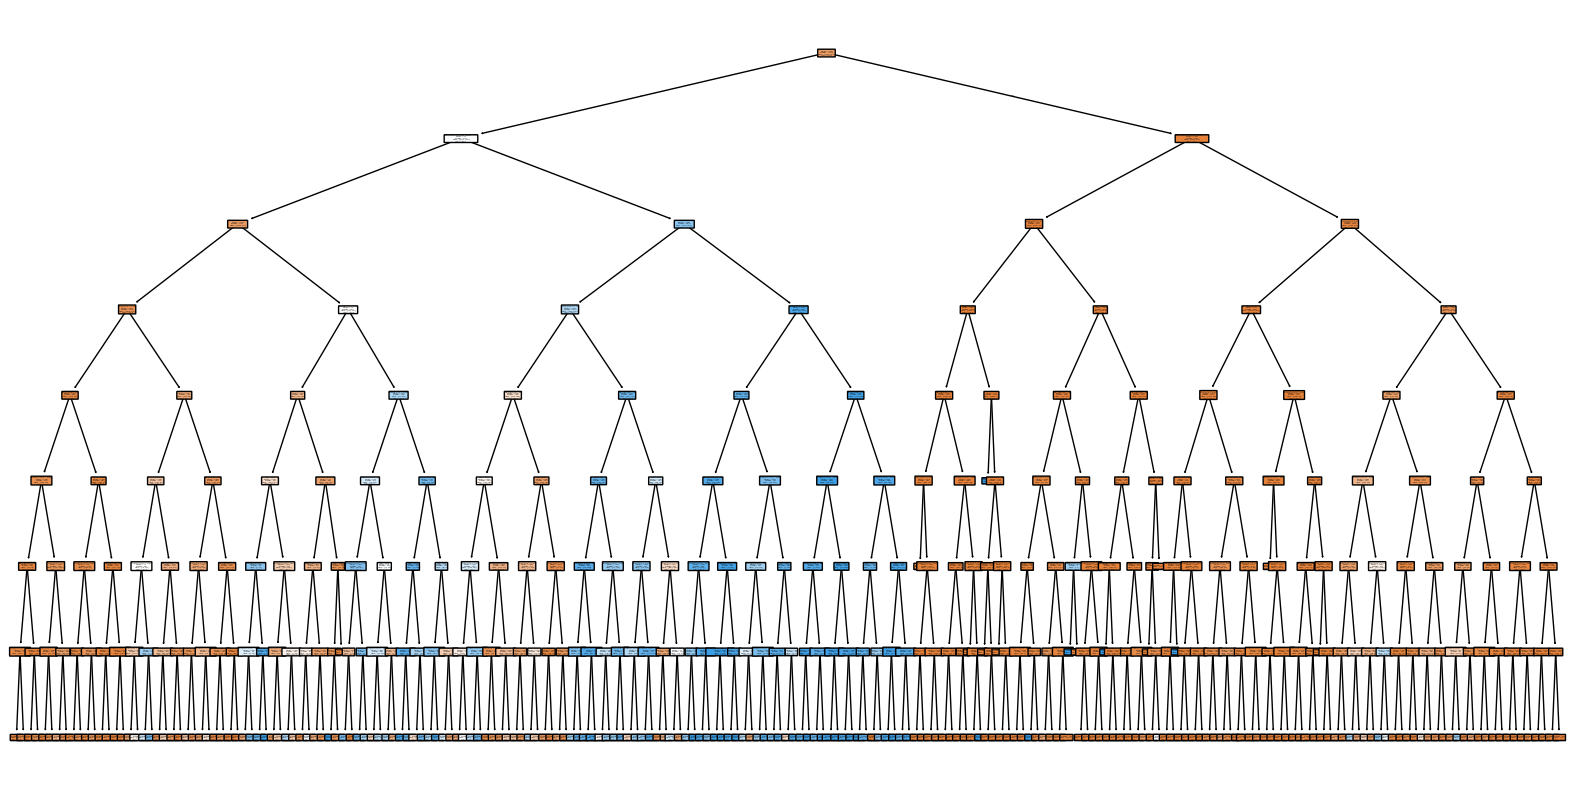

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Class_0', 'Class_1'], rounded=True, proportion=False)
plt.show()

### **Review Model Processing XGBoost**

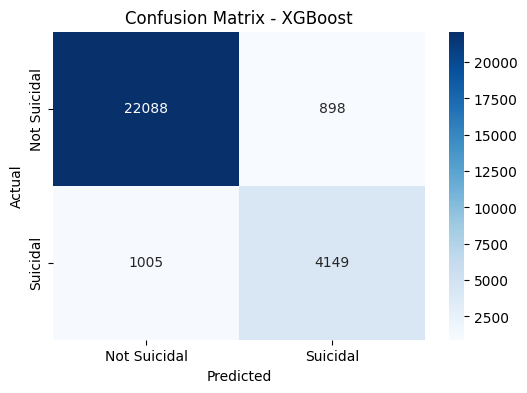

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Suicidal', 'Suicidal'],
            yticklabels=['Not Suicidal', 'Suicidal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


**Matriks Konfusi**

|                      | **Predicted: Not Suicidal** | **Predicted: Suicidal** |
|----------------------|-----------------------------|--------------------------|
| **Actual: Not Suicidal** | 22,088 (TN)                  | 898 (FP)                 |
| **Actual: Suicidal**     | 1,005 (FN)                  | 4,149 (TP)               |



**Interpretasi**

- **True Negative (TN) = 22,088**  
  Model berhasil memprediksi orang yang *tidak suicidal* dengan benar.

- **False Positive (FP) = 898**  
  Model salah memprediksi orang yang *tidak suicidal* sebagai *suicidal*.

- **False Negative (FN) = 1,005**  
  Model salah memprediksi orang yang *suicidal* sebagai *tidak suicidal* — ini berisiko karena orang ini sebenarnya butuh perhatian.

- **True Positive (TP) = 4,149**  
  Model berhasil memprediksi orang yang *suicidal* dengan benar.


<Figure size 1000x600 with 0 Axes>

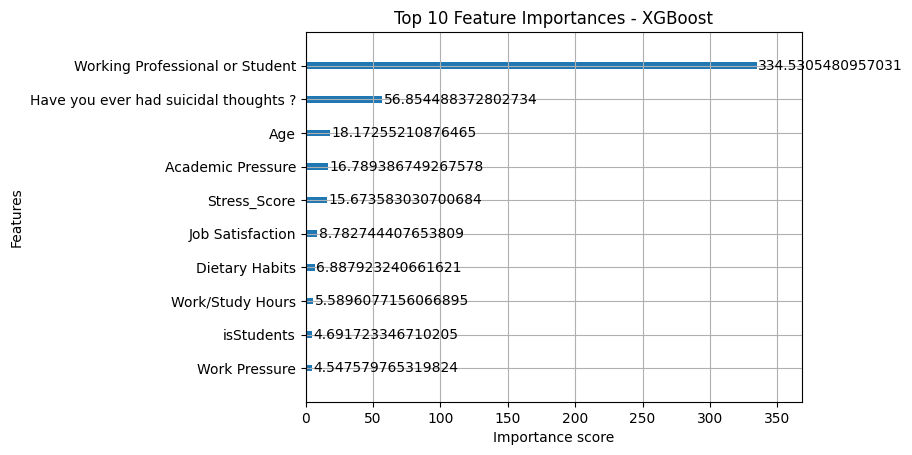

In [73]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()


**Analisis Fitur Dominan dalam Prediksi Suicidal**

1. **Working Professional or Student** (Importance: **334.53**)
Fitur paling dominan. Status apakah seseorang adalah **mahasiswa** atau **pekerja profesional** sangat memengaruhi prediksi suicidal.  
    - Mahasiswa mungkin menghadapi **tekanan akademik**.  
    - Profesional menghadapi **tekanan kerja**.  
Keduanya memengaruhi kondisi mental dengan cara yang berbeda.


2. **Have you ever had suicidal thoughts?** (Importance: **56.85**)
Riwayat **pikiran suicidal** menjadi indikator penting.  
Menunjukkan adanya **konsistensi historis** yang bisa menjadi penentu kuat dalam prediksi suicidal.


3. **Age** (Importance: **18.17**)
Usia memainkan peran penting.  
    - Kelompok usia **remaja** atau **dewasa muda** biasanya lebih rentan terhadap masalah kesehatan mental.


4. **Academic Pressure** (Importance: **16.78**)
Tekanan akademik merupakan faktor signifikan, terutama bagi mahasiswa.  
Hal ini menguatkan pentingnya **dukungan mental di lingkungan pendidikan**.


5. **Stress_Score** (Importance: **15.67**)
Tingkat stres yang dialami individu berkorelasi langsung dengan risiko suicidal.  
Banyak penelitian psikologi mendukung hubungan ini.


6. **Job Satisfaction** (Importance: **8.78**)
Kepuasan kerja berdampak pada kesehatan mental, terutama untuk profesional.  
**Ketidakpuasan kerja** dapat meningkatkan risiko depresi atau suicidal.


7. **Dietary Habits** (Importance: **6.88**)
Kebiasaan makan memengaruhi keseimbangan psikologis.  
Makanan tidak sehat sering dikaitkan dengan **masalah mood** dan **energi rendah**.


8. **Work/Study Hours** (Importance: **5.58**)
Jam kerja atau belajar yang panjang bisa menjadi pemicu stres dan kelelahan.  
Hal ini berdampak negatif pada **kesehatan mental**.


9. **isStudents** (Importance: **4.69**)
Fitur ini mungkin redundant dengan fitur pertama, tetapi tetap menunjukkan bahwa status sebagai mahasiswa punya bobot sendiri dalam model.


10. **Work Pressure** (Importance: **4.55**)
Tekanan kerja adalah faktor penting bagi pekerja profesional.  
Bisa menyebabkan **burnout** atau **stres kronis**.

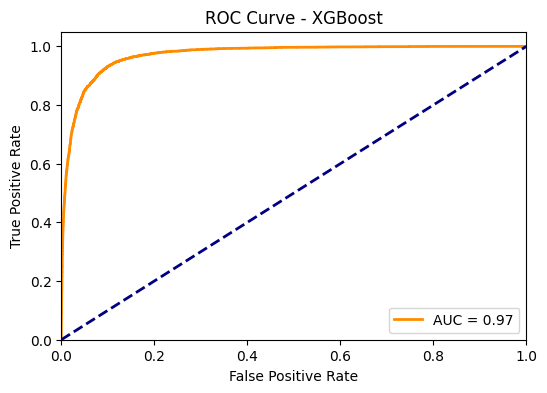

In [74]:
from sklearn.metrics import roc_curve, auc

y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()


**ROC Curve dan AUC**

**Sumbu pada Grafik**
    - **Sumbu X (False Positive Rate / FPR)**  
  Proporsi individu *tidak suicidal* yang **salah diklasifikasikan** sebagai *suicidal*.

    - **Sumbu Y (True Positive Rate / TPR atau Recall)**  
  Proporsi individu *suicidal* yang **benar terdeteksi** oleh model.


**Analisis Hasil**
    - **Garis Oranye**: ROC Curve dari model Anda.
    - **Garis Biru Putus-Putus (Diagonal)**: Baseline dari model acak (*random classifier*) dengan AUC = 0.5.


**Interpretasi Kinerja Model**

    - **AUC (Area Under Curve) = 0.97**

Nilai ini **sangat tinggi**, menunjukkan bahwa model **XGBoost**:
    - Sangat baik dalam **membedakan** antara kelas *suicidal* dan *non-suicidal*.
    - Memiliki **discriminative power** yang kuat.


**Skala Penilaian Umum AUC:**
| AUC Score     | Interpretasi         |
|---------------|----------------------|
| **> 0.9**     | Excellent             |
| **0.8 – 0.9** | Good                  |
| **0.7 – 0.8** | Fair                  |
| **< 0.7**     | Perlu perbaikan       |
